# Model Evaluation
Here, I will evaluate the trained model across various metrics.
Recall that the goal metrics for this project is:
- 80% accuracy on the test set
- \>0.70 AUC_ROC

## Import the data

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the test set
X_test = pd.read_csv('../data/X_test.csv')
y_test = pd.read_csv('../data/y_test.csv').squeeze()

## Import the model

In [3]:
from sklearn.ensemble import StackingClassifier
import pickle

In [4]:
clf = pickle.load(open('../models/stacking_classifier_optimized.pkl', 'rb'))

In [5]:
type(clf)

sklearn.ensemble._stacking.StackingClassifier

## Evaluate the model

In [6]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

In [7]:
y_preds = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

In [8]:
# Accuracy on the test set
accuracy_score(y_test, y_preds)

0.8478260869565217

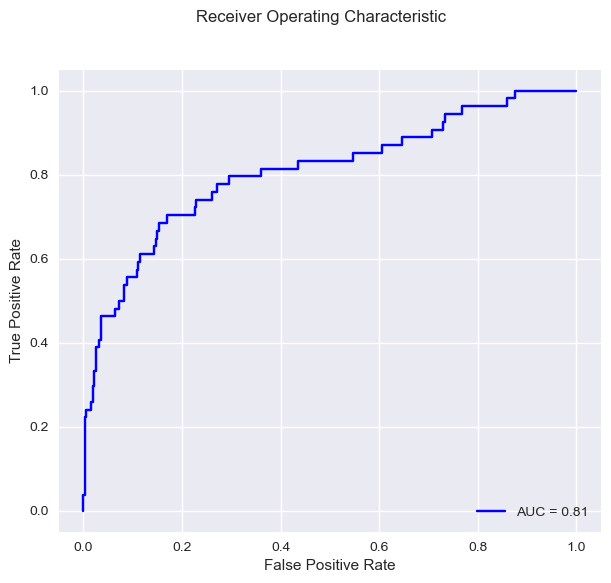

In [9]:
# Receiver Operating Characteristic (ROC curve) / Area under curve (AUC)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = roc_auc_score(y_test, y_probs[:, 1])

# Visualize ROC curve
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(7, 6))
fig.suptitle('Receiver Operating Characteristic')
ax.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f' % roc_auc)
ax.legend(loc='lower right')
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate')
plt.show()

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

In [11]:
print('True Positives\t(TP):', cm[1, 1])  # Correctly identifyied an employee leaving
print('False Positives\t(FP):', cm[0, 1]) # Incorrectly identified an employee leaving
print('True Negatives\t(TN):', cm[0, 0])  # Correctly identified an employee staying
print('False Negatives\t(FN):', cm[1, 0]) # Incorrectly identified an employee staying

True Positives	(TP): 30
False Positives	(FP): 32
True Negatives	(TN): 282
False Negatives	(FN): 24


In [12]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.92      0.90      0.91       314
        True       0.48      0.56      0.52        54

    accuracy                           0.85       368
   macro avg       0.70      0.73      0.71       368
weighted avg       0.86      0.85      0.85       368



Precision column:
- The true value is the "ratio of true positive predictions to the total positive predictions."
  - TP / (TP + FP)
  - 30 / (30 + 32)
  - = 0.48..
- The false value should be the ratio of true negative predictions to the total number of negative predictions.
  - TN / (TN + FN)
  - 282 / (282 + 24)
  - = 0.92..
- Macro avg should be the mean between the two precision values.
  - (0.92.. + 0.48..) / 2
  - = 0.7..
- Weighted avg should account for the proportion of positive values to negative values.
  - neg = TN + FP = 282 + 32 = 314
  - pos = TP + FN =  30 + 24 = 54
  - pos_ratio =  54 / (54 + 314) = 0.14673913
  - neg_ratio = 314 / (54 + 314) = 0.85326087
  - weighted_avg = (0.92.. * 0.85326087) + (0.48.. * 0.14673913) = 0.785 + 0.07.. = 0.855.. = 0.86..

Recall column:
- Recall is the "ratio of true positive predictions to the actual number of positive instances."
- True value:
  - TP / 54 = 30 / 54 = 0.556..
- False value:
  - TN / 314 = 282 / 314 = 0.898..

F1-score column:
- The F1-score is the "harmonic mean" of precision and recall, providing a balance between the two values.

## Conclusion
Although the model has metrics exceeding our goals (which were \>80% accuracy and \>0.7 AUC_ROC), it also boasts an impressive weighted F1-score of 0.85 considering the size of the dataset. This model can only become better as more internal data within an organization is collected, so this model will provide a reasonable starting point for production use. The data is pretty obviously skewed to nonattrition, which could be a simple reality when it comes to employee attrition, but we cannot simply determine that employees tend to nonattrition based only on this data set. More research and testing will be necessary to determine the real-world accuracy of our model, which may be especially difficult due to our efforts to reduce the occurence of our target class.